In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import Patch


In [2]:
SAVE_FIGURES=False

In [3]:
data_dir="checkpointz/"
data_dir="analysis/"
os.listdir(data_dir)

['nohup_BCH98mask_identity_LOOP.out',
 'transvae-64-peptides-bch-zScoreNormalized-organized-dPP64-ZScore',
 'nohup_98infer.out',
 'nohup_98pcaPlot.out',
 'nohup_pl10mic0mask_identity_10init.out',
 'transvae-64-peptides-boman-zScoreNormalized-75-organized-cdhit90-zScoreNormalized',
 'nohup_boloopB0mask_identity.out',
 'nohup_log10micInfer.out',
 'transvae-64-peptides-boman-zScoreNormalized-50-organized-cdhit90-zScoreNormalized',
 'nohup_c50mask_PCA.out',
 'nohup_log10micModelInfer2.out',
 'nohup_bc75mask_identity.out',
 'nohup_model_infer.out',
 'transvae-64-peptides-log10mic-zScoreNormalized-organized-cdhit90-zScoreNormalized',
 'nohup_b75mask_identity.out',
 'nohup_log10micPCAplots.out',
 'nohup_ls_infer_full_train.out',
 'nohup_boloopBCH98mask_PCA_50init.out',
 'nohup_pca0mask.out',
 'transvae-64-peptides-bch-zScoreNormalized-75-organized-cdhit90-zScoreNormalized',
 'nohup_b50mask_PCA.out',
 'nohup_pca.out',
 'nohup_pl10mic0mask_pca.out',
 'transvae-64-peptides-bch-zScoreNormalized-5

In [4]:
"hello world".startswith("hell")

True

In [5]:
latent_to_pca_calculated = []

for _prop in ['boman', 'hydrophobicity', 'chargepH7p2', 'boman-chargepH7p2', 'bch', "predicted-log10mic"]:
    percentages = [0,25,50,75, 98]
    if _prop=="predicted-log10mic":
        percentages = [0, 98]
    for _perc in percentages:
        
        for _d in os.listdir(data_dir):
            
            
            condn_dir = (os.path.isdir(data_dir+_d))
            if _perc==0:
                if _prop=="predicted-log10mic":
                    condn_prefix = (_d.startswith(f"transvae-64-peptides-{_prop}-zScoreNormalized-0-org"))
                else:
                    condn_prefix = (_d.startswith(f"transvae-64-peptides-{_prop}-zScoreNormalized-org"))
            else:
                condn_prefix = (_d.startswith(f"transvae-64-peptides-{_prop}-zScoreNormalized-{_perc}"))
            condn_suffix = (_d.endswith("organized-cdhit90-zScoreNormalized") )
            condn_not = ("--" not in _d)
            
            if condn_dir and condn_prefix and condn_suffix and condn_not:
                print(f"{_d=}")
                for _f in os.listdir(data_dir+_d):
                    if _f.startswith("latent_to"):
                        print(f"{_f=}")
                        latent_to_pca_calculated.append(_d)
                print()

_d='transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized'
_f='latent_to_pca_distortions.csv'

_d='transvae-64-peptides-boman-zScoreNormalized-25-organized-cdhit90-zScoreNormalized'
_f='latent_to_pca_distortions.csv'

_d='transvae-64-peptides-boman-zScoreNormalized-50-organized-cdhit90-zScoreNormalized'
_f='latent_to_pca_distortions.csv'

_d='transvae-64-peptides-boman-zScoreNormalized-75-organized-cdhit90-zScoreNormalized'
_f='latent_to_pca_distortions.csv'

_d='transvae-64-peptides-boman-zScoreNormalized-98-organized-cdhit90-zScoreNormalized'
_f='latent_to_pca_distortions.csv'

_d='transvae-64-peptides-hydrophobicity-zScoreNormalized-organized-cdhit90-zScoreNormalized'
_f='latent_to_pca_distortions.csv'

_d='transvae-64-peptides-hydrophobicity-zScoreNormalized-25-organized-cdhit90-zScoreNormalized'
_f='latent_to_pca_distortions.csv'

_d='transvae-64-peptides-hydrophobicity-zScoreNormalized-50-organized-cdhit90-zScoreNormalized'
_f='latent_to_pca_distortions.c

In [6]:
len(latent_to_pca_calculated)

27

In [7]:
latent_to_pca_calculated

['transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized',
 'transvae-64-peptides-boman-zScoreNormalized-25-organized-cdhit90-zScoreNormalized',
 'transvae-64-peptides-boman-zScoreNormalized-50-organized-cdhit90-zScoreNormalized',
 'transvae-64-peptides-boman-zScoreNormalized-75-organized-cdhit90-zScoreNormalized',
 'transvae-64-peptides-boman-zScoreNormalized-98-organized-cdhit90-zScoreNormalized',
 'transvae-64-peptides-hydrophobicity-zScoreNormalized-organized-cdhit90-zScoreNormalized',
 'transvae-64-peptides-hydrophobicity-zScoreNormalized-25-organized-cdhit90-zScoreNormalized',
 'transvae-64-peptides-hydrophobicity-zScoreNormalized-50-organized-cdhit90-zScoreNormalized',
 'transvae-64-peptides-hydrophobicity-zScoreNormalized-75-organized-cdhit90-zScoreNormalized',
 'transvae-64-peptides-hydrophobicity-zScoreNormalized-98-organized-cdhit90-zScoreNormalized',
 'transvae-64-peptides-chargepH7p2-zScoreNormalized-organized-cdhit90-zScoreNormalized',
 'transvae-6

In [8]:
manifold_distortions_calculations = {}
for _prop in ['boman', 'hydrophobicity', 'chargepH7p2', 'boman-chargepH7p2', 'bch', "predicted-log10mic"]:
    percentages = [0,25,50,75, 98]
    if _prop=="predicted-log10mic":
        percentages = [0, 98]
    for _perc in percentages:
        for _d in latent_to_pca_calculated:
            if _perc==0:

                if _prop=="predicted-log10mic":
                    if _d.endswith("zScoreNormalized-0-organized-cdhit90-zScoreNormalized") and (f"peptides-{_prop}-z" in _d ):
                            print(_d)
                            manifold_distortions_calculations[_prop+"-"+str(_perc)] = pd.read_csv(data_dir+_d+"/latent_to_pca_distortions.csv")
                else:
                    if _d.endswith("zScoreNormalized-organized-cdhit90-zScoreNormalized") and (f"peptides-{_prop}-z" in _d ):
                        print(_d)
                        manifold_distortions_calculations[_prop+"-"+str(_perc)] = pd.read_csv(data_dir+_d+"/latent_to_pca_distortions.csv")
            else:
                if (_prop+"-zS" in _d) and (f"-{_perc}-org" in _d):
                    
                    manifold_distortions_calculations[_prop+"-"+str(_perc)] = pd.read_csv(data_dir+_d+"/latent_to_pca_distortions.csv")


transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized
transvae-64-peptides-hydrophobicity-zScoreNormalized-organized-cdhit90-zScoreNormalized
transvae-64-peptides-chargepH7p2-zScoreNormalized-organized-cdhit90-zScoreNormalized
transvae-64-peptides-boman-chargepH7p2-zScoreNormalized-organized-cdhit90-zScoreNormalized
transvae-64-peptides-bch-zScoreNormalized-organized-cdhit90-zScoreNormalized
transvae-64-peptides-predicted-log10mic-zScoreNormalized-0-organized-cdhit90-zScoreNormalized


In [9]:
manifold_distortions_calculations.keys()

dict_keys(['boman-0', 'boman-25', 'boman-50', 'boman-75', 'boman-98', 'hydrophobicity-0', 'hydrophobicity-25', 'hydrophobicity-50', 'hydrophobicity-75', 'hydrophobicity-98', 'chargepH7p2-0', 'chargepH7p2-25', 'chargepH7p2-50', 'chargepH7p2-75', 'chargepH7p2-98', 'boman-chargepH7p2-0', 'boman-chargepH7p2-25', 'boman-chargepH7p2-50', 'boman-chargepH7p2-75', 'boman-chargepH7p2-98', 'bch-0', 'bch-25', 'bch-50', 'bch-75', 'bch-98', 'predicted-log10mic-0', 'predicted-log10mic-98'])

In [10]:
len(manifold_distortions_calculations)

27

In [11]:
manifold_distortions_calculations['boman-98'].columns

Index(['latent_to_PCA_trustworthiness', 'latent_to_PCA_continuity',
       'latent_to_PCA_lcmc', 'latent_to_PCA_steadiness',
       'latent_to_PCA_cohesiveness'],
      dtype='object')

/tmp/ipykernel_43347/85618274.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([100,75,50,25,2])
/tmp/ipykernel_43347/85618274.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([100,75,50,25,2])
/tmp/ipykernel_43347/85618274.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([100,75,50,25,2])
/tmp/ipykernel_43347/85618274.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([100,75,50,25,2])
/tmp/ipykernel_43347/85618274.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

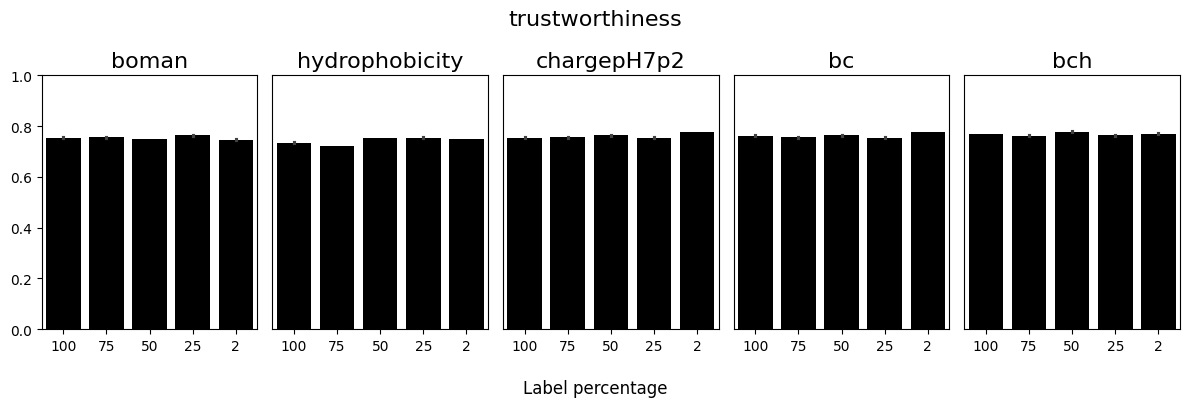

In [12]:
fontsize=16
distortion_quantities = ["trustworthiness", "continuity", "steadiness", "cohesiveness"]
properties = ['boman', 'hydrophobicity', 'chargepH7p2', 'boman-chargepH7p2', 'bch']#, "predicted-log10mic"]
for distortion_quantity in distortion_quantities: 
    fig = plt.figure(figsize=(12,4))
    
    fig.suptitle(distortion_quantity, fontsize=fontsize)
    
    fig.supxlabel("Label percentage")
    
    grid = fig.add_gridspec(1,len(properties))
    for i, _prop in enumerate(properties):
        if _prop=="predicted-log10mic":
            percents = [0,98]
        else:
            percents = ['0','25','50','75', '98']
            
        data_to_plot = pd.DataFrame()
            
        ax  = fig.add_subplot(grid[i])

        
        for _perc in percents:
            data_to_plot[f"{distortion_quantity}-{_perc}"] = manifold_distortions_calculations[f"{_prop}-{_perc}"][
                'latent_to_PCA_'+distortion_quantity
            ]
        
        # data_to_plot.boxplot(ax=ax)
        sns.barplot(data=data_to_plot, color="k", ax=ax)
        # data_to_plot.plot.bar(ax=ax)
        if i!=0:
            ax.get_yaxis().set_visible(False)

        ax.grid(visible=False)
        # ax.set_xticklabels([0,25,50,75,98])
        ax.set_xticklabels([100,75,50,25,2])

        if _prop=="boman-chargepH7p2":
            ax.set_title("bc",fontsize=fontsize)
        else:
            ax.set_title(_prop,fontsize=fontsize)
        plt.ylim([0,1.0])
    fig.tight_layout()

    break
    if SAVE_FIGURES:
        fig.savefig(f"figures/{distortion_quantity}_pca_test.svg",dpi=200)

In [13]:
print(
    data_to_plot.mean(),
    data_to_plot.std()
)

trustworthiness-0     0.768582
trustworthiness-25    0.762754
trustworthiness-50    0.777655
trustworthiness-75    0.763465
trustworthiness-98    0.769935
dtype: float64 trustworthiness-0     0.003885
trustworthiness-25    0.004950
trustworthiness-50    0.004944
trustworthiness-75    0.004263
trustworthiness-98    0.005216
dtype: float64


In [14]:
import time

In [15]:
from matplotlib.transforms import Bbox

def points_to_data(ax, dx_pt=0, dy_pt=0):
    """Convert a (dx, dy) in points to data-unit offsets."""
    fig = ax.figure
    # points → pixels
    dx_px, dy_px = dx_pt * fig.dpi / 72.0, dy_pt * fig.dpi / 72.0
    # pixels → data
    x0, y0 = ax.transData.inverted().transform((0, 0))
    x1, y1 = ax.transData.inverted().transform((dx_px, dy_px))
    return (x1 - x0), (y1 - y0)

def text_bbox_in_data(ax, text, pad_pt=0):
    """Return (x0,x1,y0,y1) of a Text's bbox in data units, padding in points."""
    fig = ax.figure
    fig.canvas.draw()  # ensure layout is computed
    r = fig.canvas.get_renderer()
    bb = text.get_window_extent(renderer=r)          # bbox in display/pixels
    if pad_pt:
        # expand bbox by pad_pt on left/right only (horiz); keep vertical same
        pad_px = pad_pt * fig.dpi / 72.0
        bb = Bbox.from_bounds(bb.x0 - pad_px, bb.y0, bb.width + 2*pad_px, bb.height)
    bb_data = bb.transformed(ax.transData.inverted())  # → data coords
    return bb_data.x0, bb_data.x1, bb_data.y0, bb_data.y1

trustworthiness
continuity
steadiness
cohesiveness


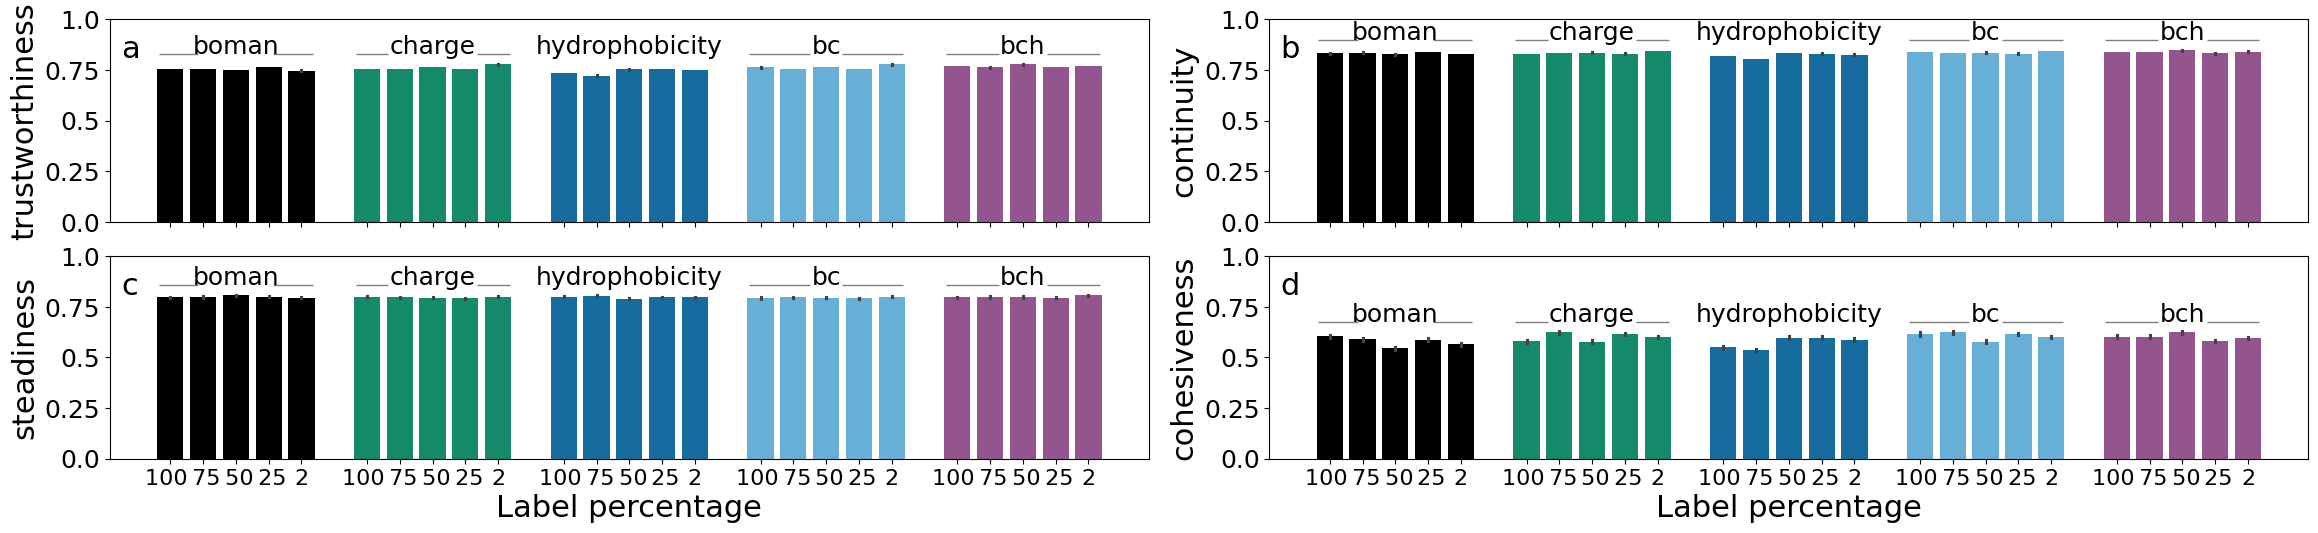

In [48]:
superfig = plt.figure(figsize=(25,5))
subfigs = superfig.subfigures(2, 2, wspace=-0.135, hspace=-0.1)

fontsize=20
distortion_quantities = ["trustworthiness", "continuity", "steadiness", "cohesiveness"]
properties = ['boman', 'chargepH7p2', 'hydrophobicity', 'boman-chargepH7p2', 'bch']#, "predicted-log10mic"]
# fig = plt.figure(figsize=(12,4))
# grid = fig.add_gridspec(2,2)

prop_to_colour = {}
prop_to_colour["boman"] = (0,0,0)
prop_to_colour["chargepH7p2"] = (0,158/255,115/255)
prop_to_colour["hydrophobicity"] = (0,114/255, 178/255)
prop_to_colour["boman-chargepH7p2"] = (86/255, 180/255, 233/255)
prop_to_colour["bch"] = (159/255, 74/255, 150/255)

hatches = ['/', '\\', 'x', "."]
panel_letters = ["a", "b", "c", "d"]
colour_dict = {}
for _dist_i, distortion_quantity in enumerate(distortion_quantities): 

    # fig = plt.figure(figsize=(12,4))
    fig = subfigs.flat[_dist_i]
    # fig.supxlabel("Label percentage")

    # if _dist_i==0:
    #     ax = fig.add_subplot(grid[0,0])
    # elif _dist_i==1:
    #     ax = fig.add_subplot(grid[0,1])
    # elif _dist_i==2:
    #     ax = fig.add_subplot(grid[1,0])
    # elif _dist_i==3:
    #     ax = fig.add_subplot(grid[1,1])
    ax = fig.add_subplot()
    _new_xtick_labels = []
    _new_xticks = []
    counter=0
    for i in range(len(properties)):        
        _new_xtick_labels += ["100 "," 75"," 50"," 25",2]
        _new_xticks += list(range(counter, counter+5, 1)) 

        counter+= 5
        if i<len(properties)-1:
            # _new_xtick_labels += [""]
            counter += 1
    


    ax.set_xticks(_new_xticks)
    ax.set_xticklabels(
        _new_xtick_labels,
        fontsize=14+2
    )

    data_to_plot = pd.DataFrame()
    for i, _prop in enumerate(properties):

        if _prop=="predicted-log10mic":
            percents = [0,98]
        else:
            percents = ['0','25','50','75', '98']
        
        for _perc in percents:
            colour_dict[f"{distortion_quantity}-{_prop}-{_perc}"] = prop_to_colour[_prop]
            data_to_plot[f"{distortion_quantity}-{_prop}-{_perc}"] = manifold_distortions_calculations[f"{_prop}-{_perc}"][
                'latent_to_PCA_'+distortion_quantity
            ]
            
        if i<len(properties)-1:
            colour_dict[f"blank-{_prop}"] = "k"
            data_to_plot[f"blank-{_prop}"] = [0]*len(manifold_distortions_calculations[f"{_prop}-{_perc}"][
                                         'latent_to_PCA_'+distortion_quantity
                                         ]
                                        )
    ax = sns.barplot(data=data_to_plot, ax=ax, palette=colour_dict)
    
    tallest = max(bar.get_height() for bar in ax.patches)
    for i, _prop in enumerate(properties):
        if _prop in ["boman-chargepH7p2"]:
            _text = "bc"
        elif _prop=="chargepH7p2":
            _text = "charge"
        else:
            _text = _prop

        _center_pos = 2 + 6*i
        y_line = tallest+0.05
        txt = ax.text(x=_center_pos,
                      y=y_line, 
                      s=_text,
                      horizontalalignment="center",
                      fontsize=16+2
                       # bbox=dict(alpha=0)
        )
        
        # Compute text edges in data coords
        if i in [2]:
            pass
            # _pad_pt = -5
        elif i==0:
            _pad_pt = 3
        else:
            _pad_pt = 1
        x0, x1, y0, y1 = text_bbox_in_data(ax, txt, pad_pt=_pad_pt)   # pad 2 pt around text
        xoff, yoff = points_to_data(ax, dy_pt=0)                    # lift line by 2 pt

        if i!=2:
            # Draw the “rules” that stop at the text edges
            ax.hlines(y_line, xmin=-0.35 + i*6, xmax=x0, linewidth=1.0, color="k", alpha=0.5)      # left segment
            ax.hlines(y_line, xmin=x1, xmax=4.35+ i*6, linewidth=1.0, color="k", alpha=0.5)      # right segment
        
    ax.grid(visible=False)

    # if _dist_i <2:
    #     _xticks = ax.get_xticks()
    #     ax.set_xticks( [""]*(len(_xticks)) )
    print(distortion_quantity)
    ax.set_ylabel(distortion_quantity, fontsize=fontsize+2)
    if _dist_i>1:
        ax.set_xlabel("Label percentage", fontsize=fontsize+2)
    else:
        ax.set_xlabel("")
        ax.tick_params(
            bottom=True,
            labelbottom=False
        )
        
    ax.set_ylim([0,1.0])
    ax.set_yticks(
        [0.0,0.25,0.50,0.75,1.0],
        labels=[0.0,0.25,0.50,0.75,1.0],
        fontsize=18
    )

    ax.text(x=-1.5, y=0.81, s=panel_letters[_dist_i], fontsize=20+2)

    # fig.tight_layout()

if SAVE_FIGURES:
    superfig.savefig(f"figures/distortion_quantities_pca_test_2x2.svg",dpi=300)

trustworthiness


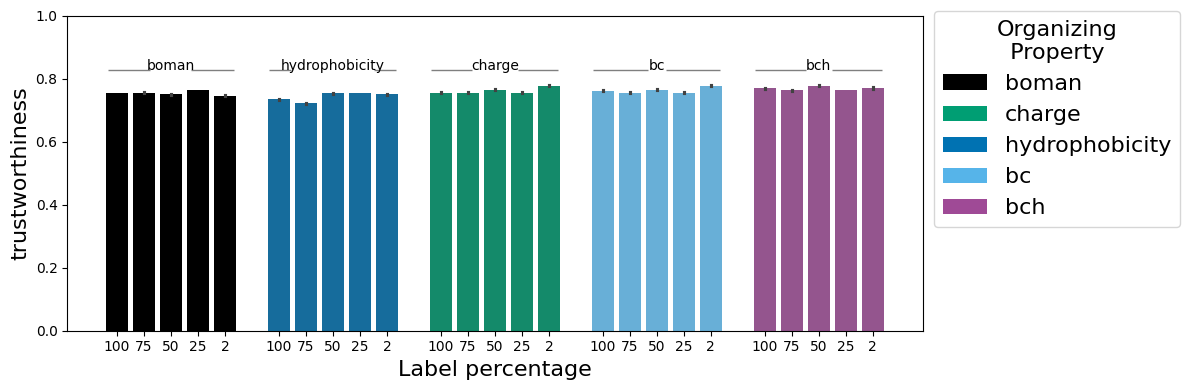

In [17]:
fontsize=16
distortion_quantities = ["trustworthiness", "continuity", "steadiness", "cohesiveness"]
properties = ['boman', 'hydrophobicity', 'chargepH7p2', 'boman-chargepH7p2', 'bch']#, "predicted-log10mic"]
# fig = plt.figure(figsize=(12,4))
# grid = fig.add_gridspec(2,2)

prop_to_colour = {}
prop_to_colour["boman"] = (0,0,0)
prop_to_colour["chargepH7p2"] = (0,158/255,115/255)
prop_to_colour["hydrophobicity"] = (0,114/255, 178/255)
prop_to_colour["boman-chargepH7p2"] = (86/255, 180/255, 233/255)
prop_to_colour["bch"] = (159/255, 74/255, 150/255)

hatches = ['/', '\\', 'x', "."]
colour_dict = {}
for _dist_i, distortion_quantity in enumerate(distortion_quantities): 

    fig = plt.figure(figsize=(12,4))
    
    # fig.supxlabel("Label percentage")

    # if _dist_i==0:
    #     ax = fig.add_subplot(grid[0,0])
    # elif _dist_i==1:
    #     ax = fig.add_subplot(grid[0,1])
    # elif _dist_i==2:
    #     ax = fig.add_subplot(grid[1,0])
    # elif _dist_i==3:
    #     ax = fig.add_subplot(grid[1,1])
    ax = fig.add_subplot()
    _new_xtick_labels = []
    _new_xticks = []
    counter=0
    for i in range(len(properties)):        
        _new_xtick_labels += [100,75,50,25,2]
        _new_xticks += list(range(counter, counter+5, 1)) 

        counter+= 5
        if i<len(properties)-1:
            # _new_xtick_labels += [""]
            counter += 1
    


    ax.set_xticks(_new_xticks)
    ax.set_xticklabels(
        _new_xtick_labels
    )

    data_to_plot = pd.DataFrame()
    for i, _prop in enumerate(properties):

        if _prop=="predicted-log10mic":
            percents = [0,98]
        else:
            percents = ['0','25','50','75', '98']
        
        for _perc in percents:
            colour_dict[f"{distortion_quantity}-{_prop}-{_perc}"] = prop_to_colour[_prop]
            data_to_plot[f"{distortion_quantity}-{_prop}-{_perc}"] = manifold_distortions_calculations[f"{_prop}-{_perc}"][
                'latent_to_PCA_'+distortion_quantity
            ]
            
        if i<len(properties)-1:
            colour_dict[f"blank-{_prop}"] = "k"
            data_to_plot[f"blank-{_prop}"] = [0]*len(manifold_distortions_calculations[f"{_prop}-{_perc}"][
                                         'latent_to_PCA_'+distortion_quantity
                                         ]
                                        )
    ax = sns.barplot(data=data_to_plot, ax=ax, palette=colour_dict)
    # ax = sns.barplot(data=data_to_plot, color="k", ax=ax, color=colour_list)
    # data_to_plot.plot.bar(ax=ax)
    tallest = max(bar.get_height() for bar in ax.patches)
    for i, _prop in enumerate(properties):
        if _prop in ["boman-chargepH7p2"]:
            _text = "bc"
        elif _prop=="chargepH7p2":
            _text = "charge"
        else:
            _text = _prop

        _center_pos = 2 + 6*i
        y_line = tallest+0.05
        txt = ax.text(x=_center_pos,
                      y=y_line, 
                      s=_text,
                      horizontalalignment="center",
                       # bbox=dict(alpha=0)
        )
        
        # Compute text edges in data coords
        if i in [1]:
            _pad_pt = -5.0
        elif i==0:
            _pad_pt = 3
        else:
            _pad_pt = 1
        x0, x1, y0, y1 = text_bbox_in_data(ax, txt, pad_pt=_pad_pt)   # pad 2 pt around text
        xoff, yoff = points_to_data(ax, dy_pt=0)                    # lift line by 2 pt

        # Draw the “rules” that stop at the text edges
        ax.hlines(y_line, xmin=-0.35 + i*6, xmax=x0, linewidth=1.0, color="k", alpha=0.5)      # left segment
        ax.hlines(y_line, xmin=x1, xmax=4.35+ i*6, linewidth=1.0, color="k", alpha=0.5)      # right segment
        
    ax.grid(visible=False)

    # Build legend handles from the dict
    handles = []
    for name, rgb in prop_to_colour.items():
        if name=="chargepH7p2":
            name = "charge"
        elif name=="boman-chargepH7p2":
            name = "bc"
        _patch = Patch(facecolor=rgb, edgecolor='none', label=name)
        handles.append(_patch)
    
    ax.legend(handles=handles, 
              title="Organizing\n  Property", 
              loc="upper left", 
              bbox_to_anchor=(1,1.05),
              fontsize=16,
              title_fontsize=16
    )
    # if _dist_i <2:
    #     _xticks = ax.get_xticks()
    #     ax.set_xticks( [""]*(len(_xticks)) )
    print(distortion_quantity)
    ax.set_ylabel(distortion_quantity, fontsize=fontsize)
    ax.set_xlabel("Label percentage", fontsize=fontsize)
    ax.set_ylim([0,1.0])
    fig.tight_layout()

    if SAVE_FIGURES:
        fig.savefig(f"figures/{distortion_quantity}_pca_test_with_LEGEND.svg",dpi=300)
    break

In [17]:
prop_to_colour

{'boman': (0, 0, 0),
 'chargepH7p2': (0, 0.6196078431372549, 0.45098039215686275),
 'hydrophobicity': (0, 0.4470588235294118, 0.6980392156862745),
 'boman-chargepH7p2': (0.33725490196078434,
  0.7058823529411765,
  0.9137254901960784),
 'bch': (0.6235294117647059, 0.2901960784313726, 0.5882352941176471)}

trustworthiness
continuity
steadiness
cohesiveness


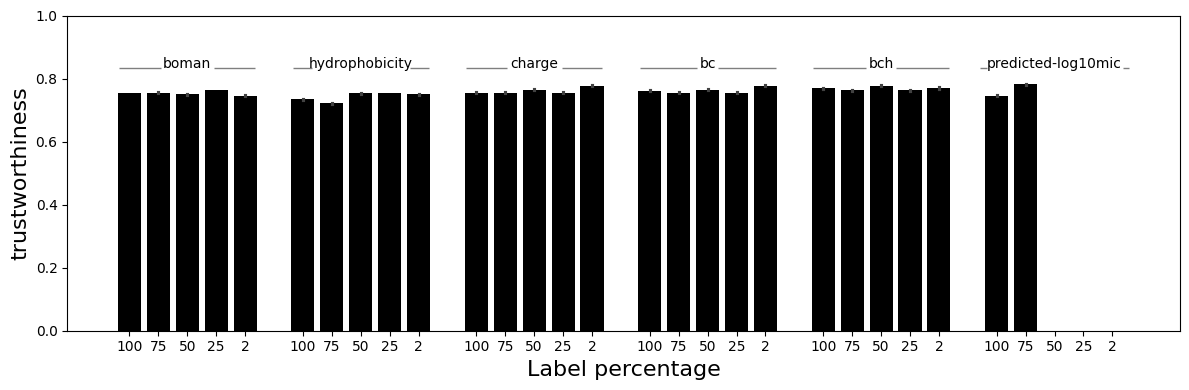

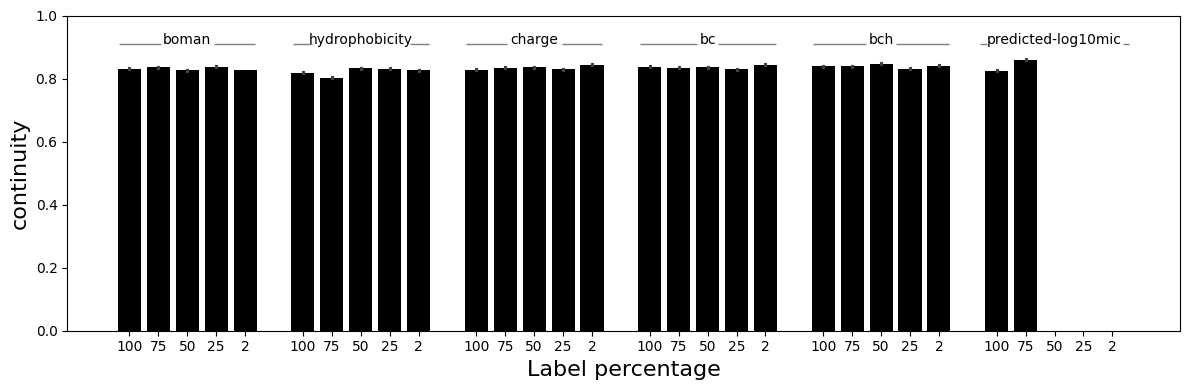

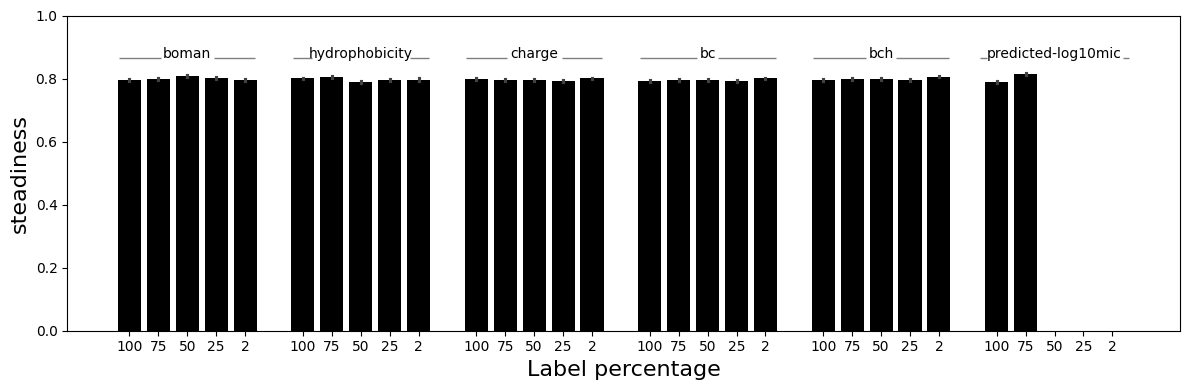

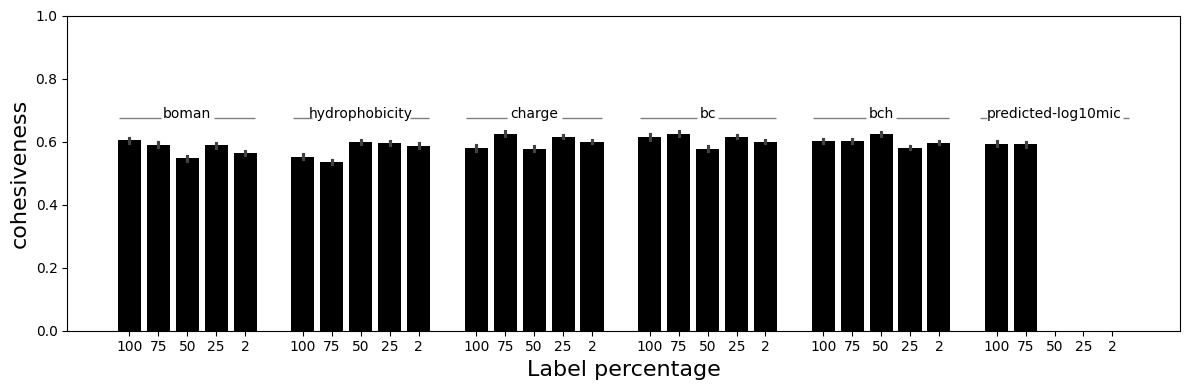

In [18]:
fontsize=16
distortion_quantities = ["trustworthiness", "continuity", "steadiness", "cohesiveness"]
properties = ['boman', 'hydrophobicity', 'chargepH7p2', 'boman-chargepH7p2', 'bch', "predicted-log10mic"]
# fig = plt.figure(figsize=(12,4))
# grid = fig.add_gridspec(2,2)
hatches = ['/', '\\', 'x', "."]
for _dist_i, distortion_quantity in enumerate(distortion_quantities): 

    fig = plt.figure(figsize=(12,4))
    
    # fig.supxlabel("Label percentage")

    # if _dist_i==0:
    #     ax = fig.add_subplot(grid[0,0])
    # elif _dist_i==1:
    #     ax = fig.add_subplot(grid[0,1])
    # elif _dist_i==2:
    #     ax = fig.add_subplot(grid[1,0])
    # elif _dist_i==3:
    #     ax = fig.add_subplot(grid[1,1])
    ax = fig.add_subplot()
    _new_xtick_labels = []
    _new_xticks = []
    counter=0
    for i in range(len(properties)):        
        _new_xtick_labels += [100,75,50,25,2]
        _new_xticks += list(range(counter, counter+5, 1)) 

        counter+= 5
        if i<len(properties)-1:
            # _new_xtick_labels += [""]
            counter += 1
    


    ax.set_xticks(_new_xticks)
    ax.set_xticklabels(
        _new_xtick_labels
    )

    data_to_plot = pd.DataFrame()
    for i, _prop in enumerate(properties):

        if _prop=="predicted-log10mic":
            percents = [0,98]
        else:
            percents = ['0','25','50','75', '98']
        
        for _perc in percents:
            data_to_plot[f"{distortion_quantity}-{_prop}-{_perc}"] = manifold_distortions_calculations[f"{_prop}-{_perc}"][
                'latent_to_PCA_'+distortion_quantity
            ]
        if i<len(properties)-1:
            data_to_plot[f"blank-{_prop}"] = [0]*len(manifold_distortions_calculations[f"{_prop}-{_perc}"][
                                         'latent_to_PCA_'+distortion_quantity
                                         ]
                                        )
    
    ax = sns.barplot(data=data_to_plot, color="k", ax=ax)
    # data_to_plot.plot.bar(ax=ax)
    tallest = max(bar.get_height() for bar in ax.patches)
    for i, _prop in enumerate(properties):
        if _prop in ["boman-chargepH7p2"]:
            _text = "bc"
        elif _prop=="chargepH7p2":
            _text = "charge"
        else:
            _text = _prop

        _center_pos = 2 + 6*i
        y_line = tallest+0.05
        txt = ax.text(x=_center_pos,
                      y=y_line, 
                      s=_text,
                      horizontalalignment="center",
                       # bbox=dict(alpha=0)
        )
        
        # Compute text edges in data coords
        if i in [1]:
            _pad_pt = -5.0
        elif i==0:
            _pad_pt = 3
        else:
            _pad_pt = 1
        x0, x1, y0, y1 = text_bbox_in_data(ax, txt, pad_pt=_pad_pt)   # pad 2 pt around text
        xoff, yoff = points_to_data(ax, dy_pt=0)                    # lift line by 2 pt

        # Draw the “rules” that stop at the text edges
        ax.hlines(y_line, xmin=-0.35 + i*6, xmax=x0, linewidth=1.0, color="k", alpha=0.5)      # left segment
        ax.hlines(y_line, xmin=x1, xmax=4.35+ i*6, linewidth=1.0, color="k", alpha=0.5)      # right segment
        
    ax.grid(visible=False)

    # if _dist_i <2:
    #     _xticks = ax.get_xticks()
    #     ax.set_xticks( [""]*(len(_xticks)) )
    print(distortion_quantity)
    ax.set_ylabel(distortion_quantity, fontsize=fontsize)
    ax.set_xlabel("Label percentage", fontsize=fontsize)
    ax.set_ylim([0,1.0])

    fig.tight_layout()

    if SAVE_FIGURES:
        fig.savefig(f"figures/{distortion_quantity}_pca_test.svg",dpi=300)

# check pc correlations with properties

In [47]:
train_or_test = "train"

In [48]:
pc_correlations = []
for _d in os.listdir(data_dir):
    if os.path.isdir(data_dir+_d) and "transvae" in _d:
        print(f"{_d=}")
        for _f in os.listdir(data_dir+_d):
            if _f.endswith(f"pca_explained_var_and_sing_vals_{train_or_test}.txt"):
                print(f"{_f=}")
                pc_correlations.append(_d)
        print()

_d='transvae-64-peptides-bch-zScoreNormalized-organized-dPP64-ZScore'
_f='pca_explained_var_and_sing_vals_train.txt'

_d='transvae-64-peptides-boman-zScoreNormalized-75-organized-cdhit90-zScoreNormalized'
_f='pca_explained_var_and_sing_vals_train.txt'

_d='transvae-64-peptides-boman-zScoreNormalized-50-organized-cdhit90-zScoreNormalized'
_f='pca_explained_var_and_sing_vals_train.txt'

_d='transvae-64-peptides-bch-zScoreNormalized-75-organized-cdhit90-zScoreNormalized'
_f='pca_explained_var_and_sing_vals_train.txt'

_d='transvae-64-peptides-bch-zScoreNormalized-50-organized-cdhit90-zScoreNormalized'
_f='pca_explained_var_and_sing_vals_train.txt'

_d='transvae-64-peptides-hydrophobicity-zScoreNormalized-50-organized-cdhit90-zScoreNormalized'
_f='pca_explained_var_and_sing_vals_train.txt'

_d='transvae-64-peptides-chargepH7p2-zScoreNormalized-25-organized-cdhit90-zScoreNormalized'
_f='pca_explained_var_and_sing_vals_train.txt'

_d='transvae-64-peptides-chargepH7p2-zScoreNormalized-50-orga

In [49]:
print(properties,'\n',percents)

['boman', 'hydrophobicity', 'chargepH7p2', 'boman-chargepH7p2', 'bch'] 
 ['0', '25', '50', '75']


In [88]:
percents

['0', '25', '50', '75']

In [101]:
pc_explained_var = {}
for _prop in properties:
    for _perc in percents:
        if (_perc=='0') and (_prop not in ['bch', 'boman-chargepH7p2']):
           continue
        for _d in pc_correlations:
            if (_prop+'-z' in _d) and ("-"+_perc+"-" in _d):
                print(_d)
                with open(data_dir+_d+f"/pca_explained_var_and_sing_vals_{train_or_test}.txt",'r') as f:
                    print(f.readlines())
                print(_prop+"-"+_perc)
                print()
                pc_explained_var[_prop+"-"+_perc] = pd.read_csv(data_dir+_d+f"/pca_explained_var_and_sing_vals_{train_or_test}.txt")
            elif (_prop+'-z' in _d) and ("ormalized-organized" in _d) and (_perc=="0"):
                print(_d)
                with open(data_dir+_d+f"/pca_explained_var_and_sing_vals_{train_or_test}.txt",'r') as f:
                    print(f.readlines())
                print(_prop+"-"+_perc)
                print()
                pc_explained_var[_prop+"-"+_perc] = pd.read_csv(data_dir+_d+f"/pca_explained_var_and_sing_vals_{train_or_test}.txt")

transvae-64-peptides-boman-zScoreNormalized-25-organized-cdhit90-zScoreNormalized
['explain_var_ratio_comp0,explain_var_ratio_comp1,explain_var_ratio_comp2,explain_var_ratio_comp3,explain_var_ratio_comp4,singular_value0,singular_value1,singular_value2,singular_value3,singular_value4\n', '0.045644283,0.036823235,0.03155497,0.031155169,0.029417552,1278.2936926604175,1148.1494285033243,1062.8484760579875,1056.0938320952846,1026.2205780558054\n']
boman-25

transvae-64-peptides-boman-zScoreNormalized-50-organized-cdhit90-zScoreNormalized
['explain_var_ratio_comp0,explain_var_ratio_comp1,explain_var_ratio_comp2,explain_var_ratio_comp3,explain_var_ratio_comp4,singular_value0,singular_value1,singular_value2,singular_value3,singular_value4\n', '0.04797173,0.042471565,0.036672793,0.033754162,0.03079436,1309.2005922857797,1231.8636306234166,1144.683711670989,1098.1891749096078,1048.9362427129406\n']
boman-50

transvae-64-peptides-boman-zScoreNormalized-75-organized-cdhit90-zScoreNormalized
['expl

In [102]:
pc_explained_var[_prop+"-"+_perc]

,explain_var_ratio_comp0,explain_var_ratio_comp1,explain_var_ratio_comp2,explain_var_ratio_comp3,explain_var_ratio_comp4,singular_value0,singular_value1,singular_value2,singular_value3,singular_value4
0,0.050196,0.04009,0.034466,0.032742,0.028417,1322.980737,1182.331509,1096.265886,1068.489944,995.417456


In [103]:
col_name="explain_var_ratio_comp0"

In [104]:
pc_explained_var[_prop+"-"+_perc][col_name].values

array([0.05019609])

In [105]:
pc_explained_var.keys()

dict_keys(['boman-25', 'boman-50', 'boman-75', 'hydrophobicity-25', 'hydrophobicity-50', 'hydrophobicity-75', 'chargepH7p2-25', 'chargepH7p2-50', 'chargepH7p2-75', 'boman-chargepH7p2-0', 'boman-chargepH7p2-25', 'boman-chargepH7p2-50', 'boman-chargepH7p2-75', 'bch-0', 'bch-25', 'bch-50', 'bch-75'])

In [127]:
index_names = []
for x in pc_explained_var.keys():
    if "boman-charge" in x:
        index_names.append( "bc-"+x.split("-")[-1] )
    else:
        index_names.append(x)

In [128]:
index_names

['boman-25',
 'boman-50',
 'boman-75',
 'hydrophobicity-25',
 'hydrophobicity-50',
 'hydrophobicity-75',
 'chargepH7p2-25',
 'chargepH7p2-50',
 'chargepH7p2-75',
 'bc-0',
 'bc-25',
 'bc-50',
 'bc-75',
 'bch-0',
 'bch-25',
 'bch-50',
 'bch-75']

In [144]:
pc_xplained_var_df = pd.concat(pc_explained_var.values())
pc_xplained_var_df.index = index_names

In [145]:
pc_xplained_var_df.tail()

,explain_var_ratio_comp0,explain_var_ratio_comp1,explain_var_ratio_comp2,explain_var_ratio_comp3,explain_var_ratio_comp4,singular_value0,singular_value1,singular_value2,singular_value3,singular_value4
bc-75,0.051471,0.033749,0.032174,0.029715,0.028900,1371.811486,1110.817314,1084.585329,1042.323430,1027.918462
bch-0,0.051973,0.037093,0.035460,0.032070,0.030569,1395.416161,1178.857425,1152.606384,1096.131728,1070.171299
bch-25,0.049468,0.038165,0.036630,0.031416,0.029519,1353.200492,1188.597668,1164.440164,1078.390232,1045.329362
bch-50,0.057877,0.039884,0.033268,0.032284,0.030810,1425.919463,1183.693619,1081.082374,1064.968760,1040.378738
bch-75,0.050196,0.040090,0.034466,0.032742,0.028417,1322.980737,1182.331509,1096.265886,1068.489944,995.417456


In [146]:
["model"]+list(pc_xplained_var_df.columns[1:])

['model',
 'explain_var_ratio_comp1',
 'explain_var_ratio_comp2',
 'explain_var_ratio_comp3',
 'explain_var_ratio_comp4',
 'singular_value0',
 'singular_value1',
 'singular_value2',
 'singular_value3',
 'singular_value4']

In [147]:
pc_xplained_var_df.reset_index(inplace=True, drop=False)
pc_xplained_var_df.columns = ["model"]+list(pc_xplained_var_df.columns[1:])
pc_xplained_var_df.head()

,model,explain_var_ratio_comp0,explain_var_ratio_comp1,explain_var_ratio_comp2,explain_var_ratio_comp3,explain_var_ratio_comp4,singular_value0,singular_value1,singular_value2,singular_value3,singular_value4
0,boman-25,0.045644,0.036823,0.031555,0.031155,0.029418,1278.293693,1148.149429,1062.848476,1056.093832,1026.220578
1,boman-50,0.047972,0.042472,0.036673,0.033754,0.030794,1309.200592,1231.863631,1144.683712,1098.189175,1048.936243
2,boman-75,0.044607,0.038701,0.036858,0.031552,0.030218,1276.667102,1189.157179,1160.501391,1073.713749,1050.776434
3,hydrophobicity-25,0.041549,0.033463,0.032309,0.031190,0.029375,1202.701864,1079.342341,1060.560393,1042.042047,1011.270306
4,hydrophobicity-50,0.039943,0.037102,0.030879,0.029971,0.029024,1187.410330,1144.406106,1044.027844,1028.572242,1012.191527


In [148]:
pc_xplained_var_df['prop'] = pc_xplained_var_df.model.str.split("-").apply(lambda x: str(x[0]))
pc_xplained_var_df['perc'] = pc_xplained_var_df.model.str.split("-").apply(lambda x: str(x[1]))

In [149]:
pc_xplained_var_df.head(2)

,model,explain_var_ratio_comp0,explain_var_ratio_comp1,explain_var_ratio_comp2,explain_var_ratio_comp3,explain_var_ratio_comp4,singular_value0,singular_value1,singular_value2,singular_value3,singular_value4,prop,perc
0,boman-25,0.045644,0.036823,0.031555,0.031155,0.029418,1278.293693,1148.149429,1062.848476,1056.093832,1026.220578,boman,25
1,boman-50,0.047972,0.042472,0.036673,0.033754,0.030794,1309.200592,1231.863631,1144.683712,1098.189175,1048.936243,boman,50


In [151]:
pc_xplained_var_df.groupby('prop')[pc_xplained_var_df.columns[1:-2]].mean()

,explain_var_ratio_comp0,explain_var_ratio_comp1,explain_var_ratio_comp2,explain_var_ratio_comp3,explain_var_ratio_comp4,singular_value0,singular_value1,singular_value2,singular_value3,singular_value4
prop,,,,,,,,,,
bc,0.048101,0.035647,0.032971,0.031430,0.028916,1308.614688,1126.329684,1083.006080,1057.321535,1014.279038
bch,0.052379,0.038808,0.034956,0.032128,0.029829,1374.379213,1183.370055,1123.598702,1076.995166,1037.824214
boman,0.046074,0.039332,0.035029,0.032154,0.030143,1288.053796,1189.723413,1122.677860,1075.998919,1041.977751
chargepH7p2,0.046737,0.035632,0.032831,0.031548,0.028880,1288.951274,1125.666431,1080.034341,1058.749854,1012.889224
hydrophobicity,0.041799,0.036704,0.031868,0.030651,0.028950,1213.377374,1136.695652,1059.564173,1039.138736,1009.891837


In [155]:
np.sqrt(pc_xplained_var_df.groupby('prop')[pc_xplained_var_df.columns[1:-2]].count())

,explain_var_ratio_comp0,explain_var_ratio_comp1,explain_var_ratio_comp2,explain_var_ratio_comp3,explain_var_ratio_comp4,singular_value0,singular_value1,singular_value2,singular_value3,singular_value4
prop,,,,,,,,,,
bc,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
bch,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
boman,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051
chargepH7p2,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051
hydrophobicity,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051,1.732051


In [156]:
se = 1.96*pc_xplained_var_df.groupby('prop')[pc_xplained_var_df.columns[1:-2]].std()/np.sqrt(pc_xplained_var_df.groupby('prop')[pc_xplained_var_df.columns[1:-2]].count())

In [157]:
se

,explain_var_ratio_comp0,explain_var_ratio_comp1,explain_var_ratio_comp2,explain_var_ratio_comp3,explain_var_ratio_comp4,singular_value0,singular_value1,singular_value2,singular_value3,singular_value4
prop,,,,,,,,,,
bc,0.002980,0.001659,0.002264,0.002226,0.002026,51.490748,17.692214,33.798500,32.064628,35.139133
bch,0.003737,0.001404,0.001402,0.000540,0.001074,44.512905,3.955569,40.264334,13.686446,30.508917
boman,0.001950,0.003255,0.003406,0.001584,0.000782,20.744286,47.369019,59.311903,23.922734,15.477091
chargepH7p2,0.003247,0.001649,0.003038,0.002869,0.002866,41.010582,22.423089,47.396992,44.614090,47.886391
hydrophobicity,0.002256,0.003464,0.000972,0.000703,0.000529,36.937296,61.008531,17.045329,10.699649,3.642085


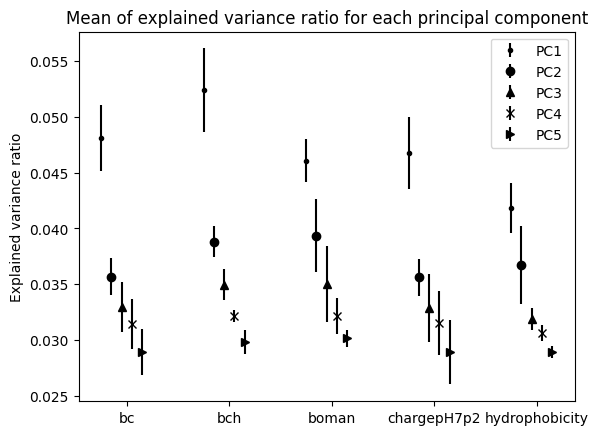

In [182]:
markers=[".","o",'^', 'x','>']
dx = 0.1
N  = 5
for i in range(N):
    _col = f"explain_var_ratio_comp{i}"
    _mn = pc_xplained_var_df.groupby('prop')[pc_xplained_var_df.columns[1:-2]].mean()[_col]
    _ci = se[_col]
    
    plt.errorbar(np.arange(N)+dx*i - (dx*N/2), 
                 _mn, 
                 yerr=_ci, 
                 linestyle="None", 
                 marker=markers[i],
                 label=f"PC{i+1}",
                 color="k"
    )
    plt.xticks(ticks=[0,1,2,3,4], labels=_mn.index)
    plt.legend()

plt.ylabel("Explained variance ratio")
plt.title("Mean of explained variance ratio for each principal component")
plt.savefig("figures/mean_explained_variance_ratio_pca_train.svg",dpi=200)

In [108]:
pc_xplained_var_df.shape

(17, 10)

In [60]:
(3,1) + (1,1)*(len(properties)-1-i)

(3, 1)

/tmp/ipykernel_27938/1432821498.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","1","","2","","3","","4","","5"])
/tmp/ipykernel_27938/1432821498.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","1","","2","","3","","4","","5"])
/tmp/ipykernel_27938/1432821498.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","1","","2","","3","","4","","5"])
/tmp/ipykernel_27938/1432821498.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","1","","2","","3","","4","","5"])
/tmp/ipykernel_27938/1432821498.py:47: UserWarning: set_ticklabels() should only be used with a 

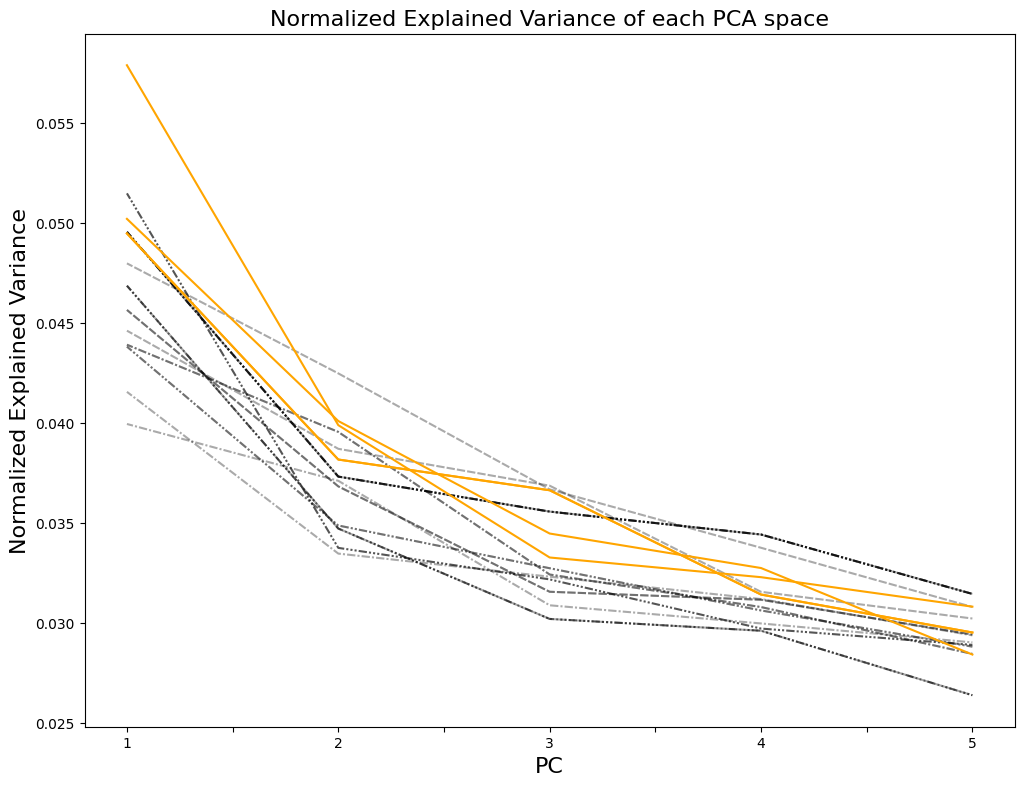

In [61]:
n_components = 5

fontsize=16

fig = plt.figure(figsize=(12,9))

ax = fig.add_subplot()

ax.set_title("Normalized Explained Variance of each PCA space", fontsize=fontsize)
ax.set_ylabel("Normalized Explained Variance", fontsize=fontsize)
ax.set_xlabel("PC", fontsize=fontsize)
# grid = fig.add_gridspec(1,len(properties))
n_props = 1
_color = "k"
for i, _prop in enumerate(properties):
    if _prop == "boman-chargepH7p2":
        n_props = 2
    elif _prop == "bch":
        _color = "orange"
        n_props = 3

    # col_name=f"explain_var_ratio_comp{i}"
    col_name=[f"explain_var_ratio_comp{i}" for i in range(n_components)]
    
    # ax  = fig.add_subplot(grid[i])
    
    for j, _perc in enumerate(percents):
        _linestyle = ( 1, (4,1) + (1,1)* (i) )
        if _prop=="bch":
            _linestyle = "-"
        
        ax.plot(
            list(range(1,n_components+1)),
            pc_explained_var[_prop+"-"+_perc][col_name].values.flatten(), 
            label=_prop,
            # alpha=1-((j)/len(percents)),
            alpha=((n_props)/3),
            linestyle=_linestyle,
            color=_color,
            
        )
    
    # if i!=0:
    #     ax.get_yaxis().set_visible(False)

    # ax.grid(visible=False)
    ax.set_xticklabels(["","1","","2","","3","","4","","5"])
    # ax.set_title(_prop)
    
    # if distortion_quantity=="continuity":
    # plt.ylim([0,1.0])

/tmp/ipykernel_27938/2831074508.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","1","","2","","3","","4","","5"])
/tmp/ipykernel_27938/2831074508.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","1","","2","","3","","4","","5"])
/tmp/ipykernel_27938/2831074508.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","1","","2","","3","","4","","5"])
/tmp/ipykernel_27938/2831074508.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["","1","","2","","3","","4","","5"])
/tmp/ipykernel_27938/2831074508.py:47: UserWarning: set_ticklabels() should only be used with a 

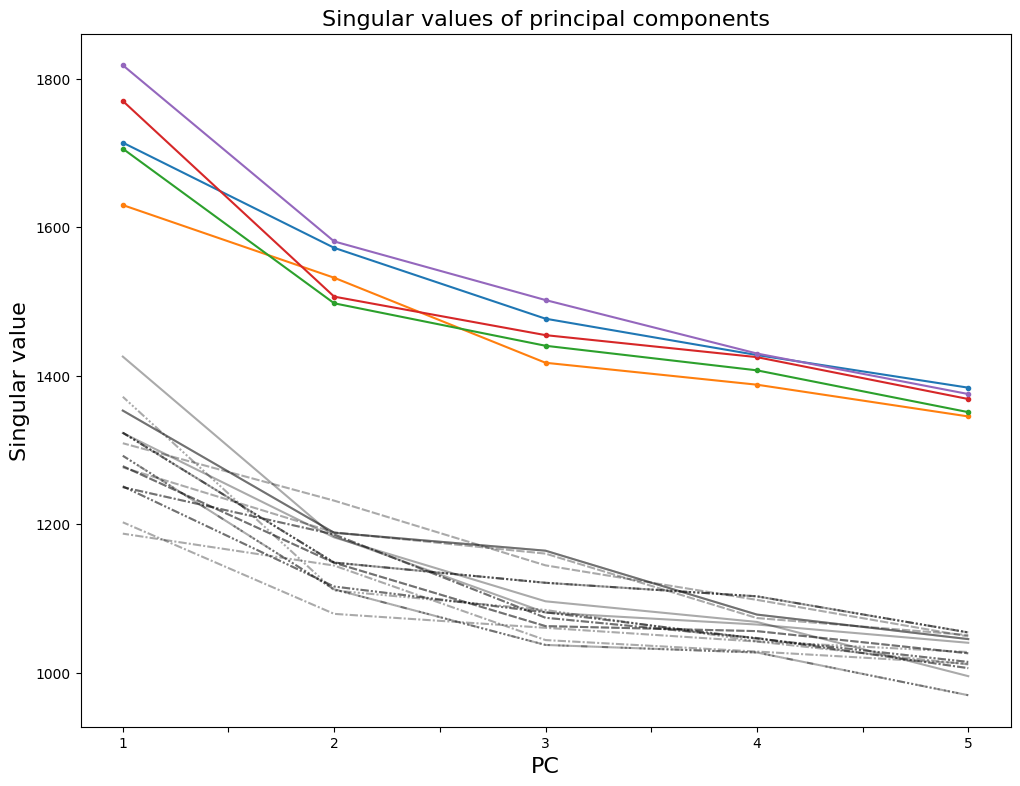

In [70]:
n_components = 5

fontsize=16

fig = plt.figure(figsize=(12,9))

ax = fig.add_subplot()

ax.set_title("Singular values of principal components", fontsize=fontsize)
ax.set_ylabel("Singular value", fontsize=fontsize)
ax.set_xlabel("PC", fontsize=fontsize)
# grid = fig.add_gridspec(1,len(properties))
n_props = 1
_color = "k"
for i, _prop in enumerate(properties):
    if _prop == "boman-chargepH7p2":
        _color='k'
        n_props = 2
    elif _prop == "bch":
        _color = "k"
        n_props = 3
    # col_name=f"explain_var_ratio_comp{i}"
    col_name=[f"singular_value{i}" for i in range(n_components)]
    
    # ax  = fig.add_subplot(grid[i])
    _average = np.zeros(5)
    for j, _perc in enumerate(percents):
        _linestyle = ( 1, (4,1) + (1,1)* (i) )
        if _prop=="bch":
            _linestyle = "-"
        _average += pc_explained_var[_prop+"-"+_perc][col_name].values.flatten()
        ax.plot(
            list(range(1,n_components+1)),
            pc_explained_var[_prop+"-"+_perc][col_name].values.flatten(), 
            label=_prop,
            # alpha=1-((j)/len(percents)),
            alpha=((1)/3),
            linestyle=_linestyle,
            color=_color,
            
        )
    ax.plot(list(range(1,n_components+1)), _average/3, marker=".")
    # if i!=0:
    #     ax.get_yaxis().set_visible(False)

    # ax.grid(visible=False)
    ax.set_xticklabels(["","1","","2","","3","","4","","5"])
    # ax.set_title(_prop)
    
    # if distortion_quantity=="continuity":
    # plt.ylim([0,1.0])

In [ ]:
pc_explained_var.keys()

In [68]:
pc_explained_var['boman-chargepH7p2-0']

,explain_var_ratio_comp0,explain_var_ratio_comp1,explain_var_ratio_comp2,explain_var_ratio_comp3,explain_var_ratio_comp4,singular_value0,singular_value1,singular_value2,singular_value3,singular_value4
0,0.049546,0.037312,0.035563,0.034416,0.031447,1323.384442,1148.443149,1121.204247,1102.976923,1054.327781


In [ ]:
_prop="boman"
for i in range(5):
    print()
    # col_name=f"explain_var_ratio_comp{i}"
    col_name=f"singular_value{i}"
    for _perc in ['25','50','75']:
        print(_prop, _perc, pc_explained_var[_prop+"-"+_perc][col_name].values)

In [ ]:
_prop="bch"
for i in range(5):
    print()
    # col_name=f"explain_var_ratio_comp{i}"
    col_name=f"singular_value{i}"
    for _perc in ['25','50','75']:
        print(_prop, _perc, pc_explained_var[_prop+"-"+_perc][col_name].values)